Mínimos cuadrados ordinarios (regresión lineal) --- 9:37 min
===

* 9:37 min | Ultima modificación: Octubre 17, 2021 | [YouTube](https://youtu.be/0NFoE4fGFak)

## Modelo de regresión lineal

En un modelo de regresión, la variable dependiente $y$ es una función lineal de las variables independientes $x_i$, tal que:


$$y = w_0 + \sum_{i=1}^N w_i * x_i + e$$


Donde: 


* $y$ es la variable explicada.


* $x_i$ es la $i$-ésima variable explicativa del comportamiento de $y$.


* $w_0$ es el intercepto del modelo.


* $w_i$ es el coeficiente de $x_i$.


* $e$ es el error del modelo. Se parte del supuesto de que siguiendo una distribución normal con media cero y varianza $\sigma^2$ constante y desconocida.

## Estimación

En la siguiente figura se presenta de forma general la regresión de $y_p = e + w_0 + w_1 * x_p$ para $p$ = 1, ..., 5. Los puntos negros representan los datos (las observaciones), y la línea negra representa la ecuación de regresión. Las líneas rojas representan el error $e$ entre el valor observado de $y_p$ y el pronósticado por el modelo para cada valor  $x_p$. 

![assets/regxy.jpg](assets/regxy.jpg) 

La estimación de los parámetros $w_i$ del modelo se realiza por mínimos cuadrados ordinarios (OLS), o lo que es lo mismo, minimizando el promedio de los errores al cuadrado (MSE)

$$\text{MSE} = \frac{1}{P} \sum_{p=1}^P e_p^2$$

Esto es, se deben encontrar los valores de $w_i$ que minimicen:

$$\text{MSE} = \frac{1}{P} \sum_{p=1}^P \left( y_p - w_0 - \sum_i^N w_i x_{p,i} \right)^2$$

para los $P$ patrones de ejemplo.

La estimación de los parámetros del modelo minimizando el MSE supone que los errores siguen una distribución normal con media cero y varianza finita y constante. 

Si las características están correlacionadas (dependencia lineal aproximada), los resultados son altamente sensitivos a los errores aleatorios en la variable objetivo.

## Dataset

[]

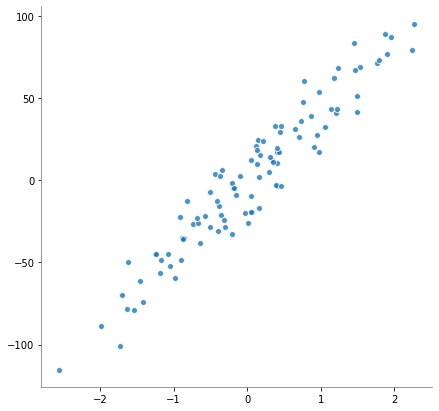

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y_true = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    #
    # Intecepto
    bias=0.0,
    #
    # numero de vectores singulares para explicar
    # los datos
    effective_rank=None,
    #
    # importancia relativa de las colas
    tail_strength=0.9,
    noise=12.0,
    shuffle=False,
    coef=False,
    random_state=0,
)

plt.figure(figsize=(7, 7))
plt.scatter(X, y_true, color="tab:blue", alpha=0.8, edgecolors="white")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.plot()

## Modelo

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [2]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression(
    #
    # Ajusta el intercepto?
    fit_intercept=True,
    #
    # Normaliza los datos?
    # Se ignora si fit_intercept=True.
    normalize=False,
)

linearRegression.fit(X, y_true)

display(
    linearRegression.coef_,
    linearRegression.intercept_,
    linearRegression.score(X, y_true),
)

array([42.66621538])

-0.9770181924368713

0.9183527010047458

In [3]:
#
# Recuperación de los parámetros con que fue
# especificado el estimador
#
linearRegression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

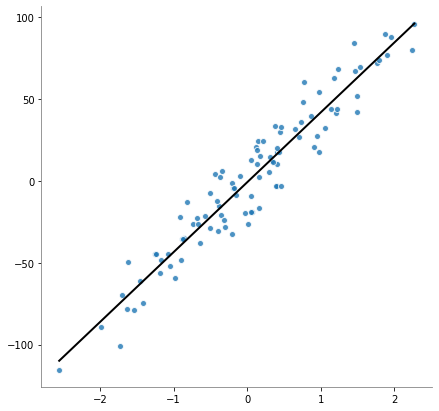

In [4]:
import numpy as np

line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
y_pred = linearRegression.predict(line_X)

plt.figure(figsize=(7, 7))

plt.scatter(X, y_true, color="tab:blue", alpha=0.8, edgecolors="white")
plt.plot(line_X, y_pred, "k", linewidth=2)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

## Efecto de outliers

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py

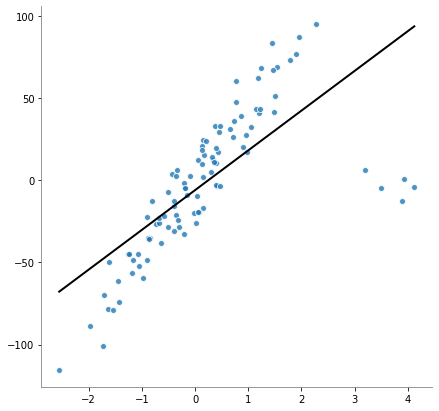

In [5]:
import numpy as np

n_outliers = 5

np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y_true[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

linearRegression.fit(X, y_true)

line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
y_pred = linearRegression.predict(line_X)

plt.figure(figsize=(7, 7))

plt.scatter(X, y_true, color="tab:blue", alpha=0.8, edgecolors="white")
plt.plot(line_X, y_pred, "k", linewidth=2)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()